In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from pathlib import Path

In [3]:
%matplotlib inline

In [4]:
# sns.set_context("paper")
plt.style.use('./aamas.mplstyle')

In [65]:
out_dir = './plots/cliff_walking4/'
results_dir = '../results/cliff_walking4(3seeds200episodes)'
print("out_dir = {}".format(out_dir))
os.makedirs(out_dir, exist_ok=True)

window_size = 1
number_of_episodes = 200 #50
optimal_return = -10
cost_bound = 2
dfs = []


out_dir = ./plots/cliff_walking4/


In [59]:
print("agents found: ", os.listdir(results_dir))

agents found:  ['OptCMDP', 'Random']


In [68]:
s = "{:>34} {}"
print(s.format("agent", "seeds"))
for agent_name in os.listdir(results_dir):
    agent_dir = os.path.join(results_dir, agent_name)
    seeds = [results_file.split('_')[-1].split('.')[0] for results_file in glob.glob('{}/*.csv'.format(agent_dir))]
    print(s.format(agent_name, len(seeds)))

                             agent seeds
                           OptCMDP 3
                            Random 3


In [67]:

order = [
    'OptCMDP',
#     'AbsOptCMDP $\pi_G$',
#     'AlwaysSafe $\pi_A$',
#     'AlwaysSafe $\pi_T$',
#     'AlwaysSafe $\pi_\\alpha$',
#     'AlwaysSafe $\pi_T$ 0.9ĉ'
#     'OptCMDP_Run1 $\pi_{t1}$',
    'Random $\pi_{R}$'
#     '$\pi_L$',
]
agents = {
    "OptCMDP"                     : order[0],
#     'AbsOptCMDP ground'           : order[1],
#     'AbsOptCMDP abs'              : order[2],
#     'SafeAbsOptCMDP (global)'     : order[3],
#     'SafeAbsOptCMDP (adaptive)'   : order[4],
#     'SafeAbsOptCMDP (global) .9ĉ' : order[5],
#     'OptCMDP_Run1'               : order[1],
    'Random'              : order[1]
#     'SafeAbsOptCMDP (local)'      : order[6],
}


In [62]:
os.listdir(results_dir)

['OptCMDP', 'Random']

In [69]:
dfs = []
for agent_name in os.listdir(results_dir):
    if agent_name not in agents:
        continue
    agent_dir = os.path.join(results_dir, agent_name)
    for results_file in glob.glob('{}/*.csv'.format(agent_dir)):
        df = pd.read_csv(results_file, index_col=0)
        seed = results_file.split('_')[-1].split('.')[0]
        df["seed"] = int(seed)
        df["Expected Value"] = df["evaluation_returns"].rolling(window=window_size).mean()
        df["Expected Cost"] = df["evaluation_costs"].rolling(window=window_size).mean()
        df["Agent"] = agents[agent_name]
        df["Episode"] = np.arange(number_of_episodes)
        dfs.append(df)
df = pd.concat(dfs)
df.head()
df['Agent'].unique()

array(['OptCMDP', 'Random $\\pi_{R}$'], dtype=object)

In [70]:
df.reset_index(inplace=True)
df

,index,training_returns,training_costs,training_length,training_fail,evaluation_returns,evaluation_costs,evaluation_length,evaluation_fail,seed,Expected Value,Expected Cost,Agent,Episode
0,0,-114,0,15,0,-116.766,3.791,14.994,0.0,0,-116.766,3.791,OptCMDP,0
1,1,-15,11,15,0,-102.117,3.746,14.997,0.0,0,-102.117,3.746,OptCMDP,1
2,2,-312,2,15,0,-54.491,5.250,14.990,0.0,0,-54.491,5.250,OptCMDP,2
3,3,-15,0,15,0,-64.478,6.066,14.978,0.0,0,-64.478,6.066,OptCMDP,3
4,4,-114,4,15,0,-36.948,6.940,14.970,0.0,0,-36.948,6.940,OptCMDP,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,195,-114,1,15,0,-217.053,4.158,14.994,0.0,2,-217.053,4.158,Random $\pi_{R}$,195
1196,196,-213,13,15,0,-228.337,3.868,14.992,0.0,2,-228.337,3.868,Random $\pi_{R}$,196
1197,197,-213,4,15,0,-220.425,4.088,15.000,0.0,2,-220.425,4.088,Random $\pi_{R}$,197
1198,198,-411,5,15,0,-231.214,3.933,14.998,0.0,2,-231.214,3.933,Random $\pi_{R}$,198


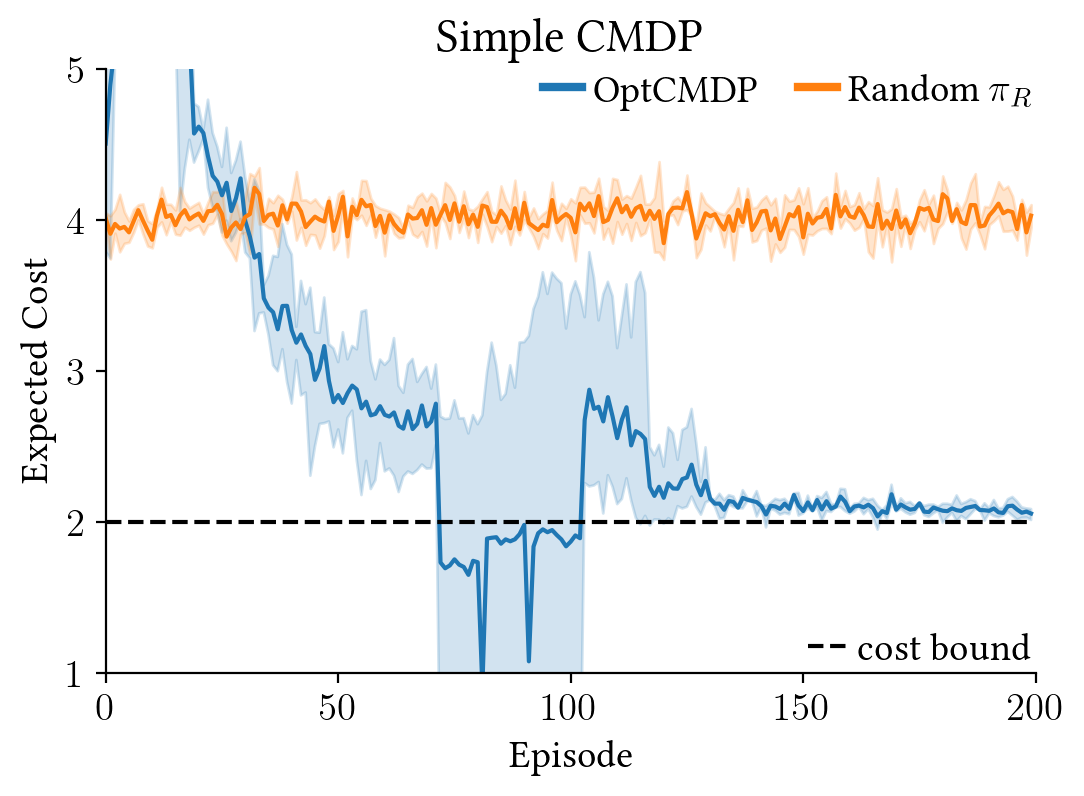

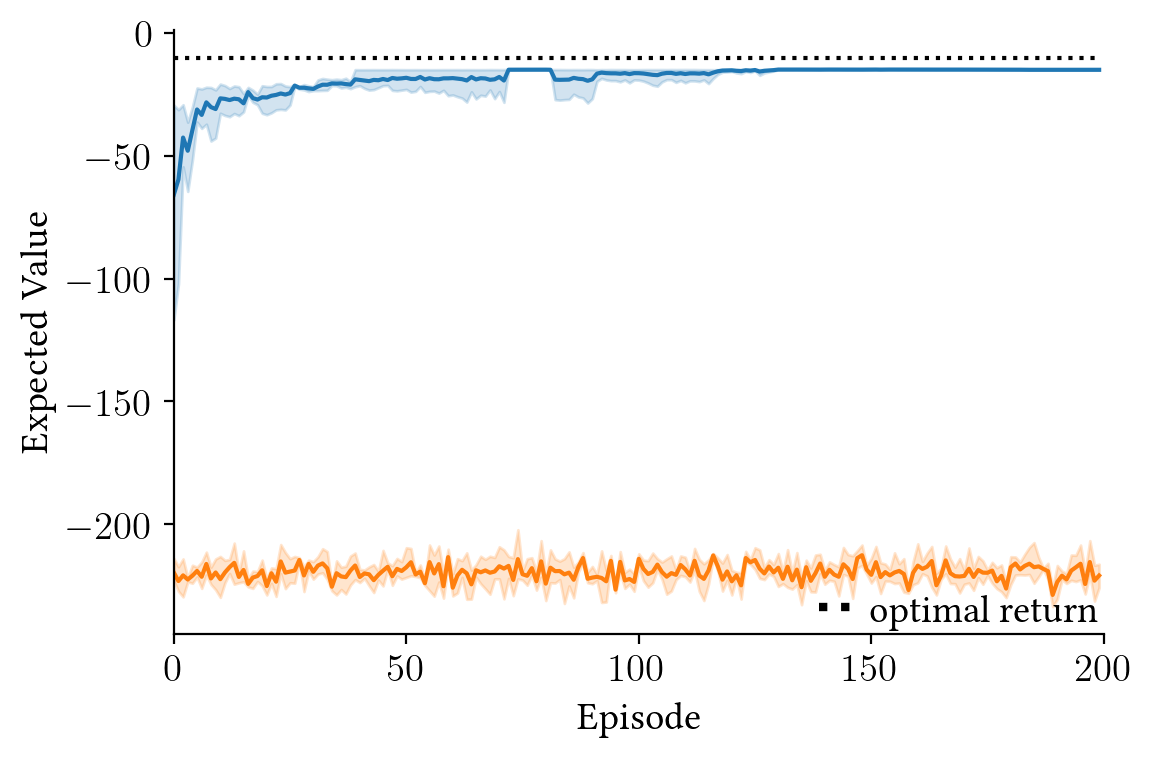

In [71]:

plt.style.use('./aamas.mplstyle')
def plot_and_save(column, data, out_dir):
    fig = plt.figure()
    ax = sns.lineplot(x="Episode", y=column, hue="Agent",
                      data=data, hue_order=order,
#                       ci=None,
#                       ci="sd",
                      legend='brief' if 'Cost' in column else False,
                      )    
    if 'Cost' in column:
        handles, labels = ax.get_legend_handles_labels()
        leg = ax.legend(handles=handles[:], labels=labels[:], ncol=2)
        for legobj in leg.legendHandles:
            legobj.set_linewidth(3.0)
        plt.gca().add_artist(leg)
        l1, = plt.plot(np.arange(number_of_episodes),
                 np.ones(number_of_episodes)*cost_bound,
                 linestyle='dashed', marker='', color='black',
                label='cost bound')
        ax.set_ylim(1, 5)
        ax.set_title("Simple CMDP")
        ax.legend(handles=[l1], ncol=1, loc='lower right')
    else:
#         handles, labels = ax.get_legend_handles_labels()
        l2, = plt.plot(np.arange(number_of_episodes),
                 np.ones(number_of_episodes)*optimal_return,
                 linestyle=':', marker='', color='black',
                label='optimal return')
#         ax.set_ylim(2, 10)
#         leg = ax.legend(handles=handles[:], labels=labels[:], ncol=2)
#         plt.gca().add_artist(leg)
        leg = ax.legend(handles=[l2], ncol=1, loc='lower right')
        
        for legobj in leg.legendHandles:
            legobj.set_linewidth(3.0)
    ax.set_xlim(0, number_of_episodes)

    
#     remove_border()
    file_name = column.replace(" ", "_").lower()
#     fig.savefig(os.path.join(out_dir, file_name + '.png'), dpi=300, bbox_inches='tight')
    fig.savefig(os.path.join(out_dir, file_name + '.pdf'), dpi=300, bbox_inches='tight')

plot_and_save("Expected Cost", df, out_dir)
plot_and_save("Expected Value", df, out_dir)
# plot_and_save("Expected Cost", df[df["Agent"].str.contains("AbsOptCMDP abs")], out_dir)